# Introduction to Medical Image Registration using Deep Neural Networks, using DeepReg

### Authors, Acknowledgements etc etc

# Table of Contents
1. [Set-up](#setup)
2. [Introduction to Registration](#IntroReg)
3. [Registration with Deep Learning](#DeepRegistrationIntro)
4. [A simple non-rigid registration using Deep Learning](#third-example)
5. [MIR using a DNN](#fourth_example)
6. [References](#references)

# Set-up <a name="setup"></a>
This tutorial depends on the package [DeepReg](https://github.com/DeepRegNet/DeepReg), which in turn has external dependencies which are managed by `pip`. 

To ensure the demo'd algorithms can run from this Google Colab notebook, you will need to mount your Google Drive and clone the repository into it. You can do this by running the following commands.

You can also follow along in a local copy of the repo - in this case, follow instructions for set up at **Link to local setup instructions**.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
! pwd


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/
/content


Once the drive is mounted, ensure that you have GPU enabled for more efficient training. To do this, go to the Edit on the upper left hand bar:
Edit -> Click on Notebook Settings -> Enable GPU

In [2]:
import os
# Make a directory in your google drive namde "MICCAI_2020_reg_tutorial"
if not os.path.exists("./MICCAI_2020_reg_tutorial"):
  os.makedirs("./MICCAI_2020_reg_tutorial")
# Move into the dir
%cd ./MICCAI_2020_reg_tutorial
! pwd

/content/MICCAI_2020_reg_tutorial
/content/MICCAI_2020_reg_tutorial


In [3]:
# Clone the DeepReg repository which contains the code
! git clone https://github.com/DeepRegNet/DeepReg.git
%cd ./DeepReg/
# pip install into the notebook env
! pip install -e .
! pip install wget
! pwd

Cloning into 'DeepReg'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4953 (delta 0), reused 1 (delta 0), pack-reused 4949
Receiving objects: 100% (4953/4953), 10.84 MiB | 6.48 MiB/s, done.
Resolving deltas: 100% (3286/3286), done.
/content/MICCAI_2020_reg_tutorial/DeepReg
Obtaining file:///content/MICCAI_2020_reg_tutorial/DeepReg
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 92kB 4.7MB/s 
     |████████████████████████████████| 102kB 5.4MB/s 
     |████████████████████████████████| 174kB 8.1MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 256kB 8.6MB/s 
     |████████████████████████████████| 235kB 12.5MB/s 
     |████████████████████████████████| 747kB 13.0MB/s 
   

/content/MICCAI_2020_reg_tutorial/DeepReg


# Introduction to Registration <a name="IntroReg"></a>

Image registration is an essential process in many clinical applications and computer assisted interventions **cite**. Applications of medical image registration include - but are not limited to:
* Longitudinal comparison of images for a given patient with the same imaging modality: for example, comparing the outcome of given cancer treatment in a patients' CT scans over time. **cite**
* Inter-subject comparison: for example, **cite**
* Multi-modal registration for image guided surgery: for example, aligning real-time ultrasound scans to pre-operative CT or MRI scans to real-time achieve guidance in neurosurgical or abdominal applications. **cite**

Image registration is the mapping of one coordinate system to another, and can be sub-divided into rigid registrations and non-rigid registrations (depending on whether or not tissue deformations is modelled).

## Classical Registration Methods
* **Point based registration**: a transformation between point clouds can be estimated using Iterative Closest Point (ICP) or it's more robust variant, Global Iterative ICP (GO-ICP) **cite**. The basis of ICP is to iteratively minimise the L2 distance between the two point clouds, estimating a transformation from the found correspondence, applying the transformation, and repeating the process many times.
* **Dense Displacement Fields**: typically, medical imaging data does not come in point cloud format, but rather, 2D, 3D and 4D matrices.

## Why use Deep Learning for MIR?
Classical methods tend to be


# Image Registration with Deep Learning <a name="DeepRegistrationIntro"></a>

For deep learning methods, pairs of images, denoted as moving
and fixed images, are passed to the network to predict a transformation between the images.

The deep learning approach for MIR will depend on mainly three factors:

1. What type of transformation is one trying to predict?
2. What type data is being registered?
3. Is the data paired and/or labeled?

## Types of transformations

- **Predicting a dense displacement field**

  Given a pair of moving and fixed images, a registration network
  can be trained to output dense displacement field (DDF) of the same shape as the moving image. Each value in the DDF
  can be considered as the placement of the corresponding pixel / voxel of the moving
  image. Therefore, the DDF defines a mapping from the moving image's coordinates to the
  fixed image.

  In this tutorial, we mainly focus on DDF-based methods.

- **Predict a dense velocity field**

  Another option is to predict a dense velocity field (DVF) between a pair of images, such that a diffeomorphic
  DDF can be numerically integrated. Read
  ["A fast diffeomorphic image registration algorithm"](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.474.1033&rep=rep1&type=pdf)
  for more details.

- **Predict an affine transformation**

  A more constrained option is to predict an affine transformation, parameterised the
  affine transformation matrix of 12 degrees of freedom. The DDF can then be computed to
  resample the moving images in fixed image space.

- **Predict a region of interest**

  Instead of outputting the transformation between coordinates, given moving image,
  fixed image, and a region of interest (ROI) in the moving image, the network can
  predict the ROI in fixed image directly. Interested readers are referred to the MICCAI
  2019 paper:
  [Conditional segmentation in lieu of image registration](https://arxiv.org/abs/1907.00438)


## Data availability - level of supervision

Depending on the availability of the data labels, registration networks can be trained
with different approaches:

### Unsupervised

When the data label is unavailable, training can be achieved via an unsupervised loss.
The
following is an illustration of an unsupervised DDF-based registration network.

![Unsupervised DDF-based registration network](asset/registration-ddf-nn-unsupervised.svg ":size=600")

The loss function often consists of the intensity based loss and deformation loss.

### Weakly-supervised

When there is no intensity based loss that is appropriate for the image pair one would
like to register, the training can take a pair of corresponding moving and fixed labels
(in addition to the image pair), represented by binary masks, to compute a label
dissimilarity (feature based loss) to drive the registration.

Combined with the regularisation on the predicted displacement field, this forms a
weakly-supervised training. An illustration of an weakly-supervised DDF-based
registration network is provided below.

When multiple labels are available for each image, the labels can be sampled during
training iteration, such that only one label per image is used in each iteration of the
data set (epoch). Read [data sampling API](tutorial_sampling.md) for more details.

![Weakly-supervised DDF-based registration network](asset/registration-ddf-nn-weakly-supervised.svg ":size=600")

### Combined

When the data label is available, combining intensity based, feature based, and
deformation based losses together has shown superior registration accuracy, compared to
unsupervised and weakly supervised methods. Following is an illustration of a combined
DDF-based registration network.

![Combined DDF-based registration network](asset/registration-ddf-nn-combined.svg ":size=600")

## Losses - depend on supervision!

To train the deep registration network, measures of similarity between the input images and their transformations are mainly used:

- **Intensity based (image based) loss**

  This type of loss measures the dissimilarity of the fixed image and warped moving
  image, which is adapted from the classical image registration methods. Intensity based
  loss is modality-independent and similar to many other well-studied computer vision
  and medical imaging tasks, such as image segmentation.

  The common loss functions are normalized cross correlation (NCC), sum of squared
  distance (SSD), and normalized mutual information (MI).

- **Feature based (label based) loss**
  Provided labels for the input images, a feature based loss may be used to measure the (dis)similarity of warped regions of interest. Having computed a transformation between images using the net, one of the labels is warped and compared to the ground truth image label.
 Labels are typically manually contoured organs.

  The common loss function is Dice loss, Jacard and average cross-entropy over all
  voxels, which are measures of the overlap of the ROIs. The loss will minimise the negative overlap measure (eg. l = 1 - dice_score) to maximise overlap of the regions during training.

- **Deformation loss**
  Additionally, training may be regularised by computing the "likelihood" of a given displacement field. High deformation losses point to very unlikely displacement due to high gradients of the field. For DDFs, typical regularisation losses are bending energy losses, L1 or L2 norms of the displacement gradients.



# Learning a rigid deformation from a single pair of images

We will define a single layer example using functions from DeepReg, and train it to register two images.

This demo uses data from **where is this data from.**

First, we will illustrate the possibility of "self-registering" an image to it's affine deformed counterpart.

Then, we will register two subjects' scans (inte-subject registration).

## Learning an affine transformation: "self-registration"

In [4]:
# We import some utility moodules.
import nibabel
import tensorflow as tf 
import deepreg.model.layer as layer
import deepreg.model.loss.image as image_loss
import deepreg.model.loss.deform as deform_loss
import deepreg.model.layer_util as layer_util
import matplotlib.pyplot as plt
import os
import h5py
from tensorflow.keras.utils import get_file

In [ ]:
## We download the data for this example.
MAIN_PATH = os.getcwd()

DATA_PATH = "dataset"
if not os.path.exists(os.path.join(MAIN_PATH, DATA_PATH)):
  os.makedirs(os.path.join(MAIN_PATH, DATA_PATH))

FILE_PATH = os.path.abspath(os.path.join(MAIN_PATH, DATA_PATH, "demo2.h5"))
ORIGIN = "https://github.com/YipengHu/example-data/raw/master/promise12/demo2.h5"

get_file(FILE_PATH, ORIGIN)
print("Prostate MR data downloaded: %s." % FILE_PATH)

os.chdir(MAIN_PATH)

DATA_PATH = "dataset"
FILE_PATH = os.path.join(MAIN_PATH, DATA_PATH, "demo2.h5")

fid = h5py.File(FILE_PATH, "r")

In [75]:
# Defining some utility functions
@tf.function
def train_step(warper, weights, optimizer, mov, fix):
    """
    Train step function for backpropagation using gradient tape

    :param warper: warping function returned from layer.Warping
    :param weights: trainable ddf [1, f_dim1, f_dim2, f_dim3, 3]
    :param optimizer: tf.optimizers
    :param mov: moving image [1, m_dim1, m_dim2, m_dim3]
    :param fix: fixed image [1, f_dim1, f_dim2, f_dim3]
    :return:
        loss: overall loss to optimise
        loss_image: image dissimilarity
        loss_deform: deformation regularisation
    """
    with tf.GradientTape() as tape:
        pred = warper(inputs=[weights, mov])
        # Calculating the image loss between the ground truth and prediction
        loss_image = image_loss.dissimilarity_fn(
            y_true=fix, y_pred=pred, name=image_loss_name
        )
        # We calculate the deformation loss
        loss_deform = deform_loss.local_displacement_energy(weights, deform_loss_name)
        # Total loss is weighted
        loss = loss_image + weight_deform_loss * loss_deform
    # We calculate the gradients by backpropagating the loss to the trainable layer,
    # which for registration is our ddf
    gradients = tape.gradient(loss, [weights])
    # Using our tf optimizer, we apply the gradients
    optimizer.apply_gradients(zip(gradients, [weights]))
    return loss, loss_image, loss_deform

def plot_results(warping, var_ddf, moving_image, fixed_image):
  """
  Plotting the results from training
  :param warping: Warping layer instance
  :param var_ddf: Trained DDF tensor [IM_SIZE_0, IM_SIZE_1, 3]
  :param moving_image: [IM_SIZE_0, IM_SIZE_1, 3]
  :param fixed_image:  [IM_SIZE_0, IM_SIZE_1, 3]
  """
  warped_moving_image = warping(inputs=[var_ddf, moving_image])
  # Display
  idx_slices = [int(5 + x * 5) for x in range(int(fixed_image_size[3] / 5) - 1)]
  nIdx = len(idx_slices)
  plt.figure()
  for idx in range(len(idx_slices)):
      axs = plt.subplot(nIdx, 3, 3 * idx + 1)
      axs.imshow(moving_image[0, ..., idx_slices[idx]], cmap="gray")
      axs.axis("off")
      axs = plt.subplot(nIdx, 3, 3 * idx + 2)
      axs.imshow(fixed_image[0, ..., idx_slices[idx]], cmap="gray")
      axs.axis("off")
      axs = plt.subplot(nIdx, 3, 3 * idx + 3)
      axs.imshow(warped_moving_image[0, ..., idx_slices[idx]], cmap="gray")
      axs.axis("off")
  plt.ion()
  plt.show()

def display(moving_image, fixed_image):
  """
  Displaying our two image tensors to register
  :param moving_image: [IM_SIZE_0, IM_SIZE_1, 3]
  :param fixed_image:  [IM_SIZE_0, IM_SIZE_1, 3]
  """
  # Display
  idx_slices = [int(5+x*5) for x in range(int(fixed_image_size[3]/5)-1)]
  nIdx = len(idx_slices)
  plt.figure()
  for idx in range(len(idx_slices)):
      axs = plt.subplot(nIdx, 2, 2*idx+1)
      axs.imshow(moving_image[0,...,idx_slices[idx]], cmap='gray')
      axs.axis('off')
      axs = plt.subplot(nIdx, 2, 2*idx+2)
      axs.imshow(fixed_image[0,...,idx_slices[idx]], cmap='gray')
      axs.axis('off')
  plt.show()

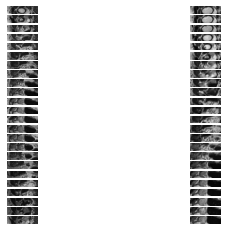

In [76]:
## We define some registration parameters
image_loss_name = "lncc" # local normalised cross correlation loss between images
deform_loss_name = "bending" # Loss to measure the bending energy of the ddf
weight_deform_loss = 1e3 # we weight the deformation loss
learning_rate = 0.1
total_iter = int(1000)
initialiser = tf.random_normal_initializer(mean=0, stddev=1e-3)

# We get an image from the dataset
moving_image = tf.cast(tf.expand_dims(fid["image0"], axis=0), dtype=tf.float32)

# Apply a random affine-transformed to the image
fixed_image_size = moving_image.shape
# Generate a random transform that scales the image up by 40%
random_transform = layer_util.random_transform_generator(batch_size=1, seed=1, scale=0.4)
grid_ref = layer_util.get_reference_grid(grid_size=fixed_image_size[1:4])
# We generate our "paired" fixed image by applying our random transform
fixed_image = layer_util.resample(vol=moving_image, loc=layer_util.warp_grid(grid_ref, random_transform))

display(moving_image, fixed_image)

In [77]:

# Creating our DDF tensor that can be trained
# The DDF will be of shape [IM_SIZE_1, IM_SIZE_2, 3],
# representing the displacement field at each dimension.
var_ddf = tf.Variable(initialiser(fixed_image_size + [3]), name="ddf", trainable=True)

# We create a warping layer and initialise an optimizer
warping = layer.Warping(fixed_image_size=fixed_image_size[1:4])
optimiser = tf.optimizers.Adam(learning_rate)

## Training the layer
## For this training, we are trying to predict the random transform generated.
## With GPU this takes about 5 minutes.
for step in range(total_iter):
    # Call the gradient tape function
    loss_opt, loss_image_opt, loss_deform_opt = train_step(
        warping, var_ddf, optimiser, moving_image, fixed_image
    )
    if (step % 50) == 0:  # print info at every 50th step
        tf.print(
            "Step",
            step,
            "loss",
            loss_opt,
            image_loss_name,
            loss_image_opt,
            deform_loss_name,
            loss_deform_opt,
        )
        # Visualising loss during training

        # plt.figure()
        # fig, axs = plt.subplots(1, 3)
        # warped_moving_image = warping(inputs=[var_ddf, moving_image])
        # axs[0].imshow(moving_image[0, ..., 12])
        # axs[1].imshow(fixed_image[0, ..., 12])
        # axs[2].imshow(warped_moving_image[0, ..., 12])
        # plt.show()

Step 0 loss [-0.169968009] lncc [-0.172592103] bending [2.6241014e-06]
Step 50 loss [-0.133408234] lncc [-0.17533718] bending [4.19289463e-05]
Step 100 loss [-0.175399423] lncc [-0.176673517] bending [1.27410124e-06]
Step 150 loss [-0.176504895] lncc [-0.177872509] bending [1.36761776e-06]
Step 200 loss [-0.17714937] lncc [-0.17902872] bending [1.87934404e-06]
Step 250 loss [-0.176997811] lncc [-0.180164859] bending [3.16705064e-06]
Step 300 loss [-0.173329338] lncc [-0.181272656] bending [7.94331208e-06]
Step 350 loss [-0.164321065] lncc [-0.182349205] bending [1.80281368e-05]
Step 400 loss [-0.155185848] lncc [-0.183384404] bending [2.81985522e-05]
Step 450 loss [-0.142687321] lncc [-0.184368789] bending [4.16814764e-05]
Step 500 loss [-0.138276234] lncc [-0.185284138] bending [4.70079e-05]
Step 550 loss [-0.133324638] lncc [-0.186141342] bending [5.28167038e-05]
Step 600 loss [-0.131174341] lncc [-0.186938703] bending [5.57643652e-05]
Step 650 loss [-0.131639332] lncc [-0.187673077]

In [ ]:
# Plotting the results
plot_results(warping, var_ddf, moving_image, fixed_image)


## Learning an affine transformation: inter_subject registration

In [37]:
## We define some registration parameters
image_loss_name = "lncc" # local normalised cross correlation loss between images
deform_loss_name = "bending" # Loss to measure the bending energy of the ddf
weight_deform_loss = 1e3 # we weight the deformation loss
learning_rate = 0.1
total_iter = int(3000) # This will train for longer

Prostate MR data downloaded: /content/MICCAI_2020_reg_tutorial/DeepReg/dataset/demo2.h5.


In [38]:
# We get our two subject images from our datasets
moving_image = tf.cast(tf.expand_dims(fid["image0"], axis=0), dtype=tf.float32)
fixed_image = tf.cast(tf.expand_dims(fid["image1"], axis=0), dtype=tf.float32)

Step 0 loss [-0.176173344] lncc [-0.178795248] bending [2.62190451e-06]


<Figure size 432x288 with 0 Axes>

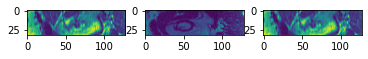

Step 50 loss [-0.139896929] lncc [-0.181867123] bending [4.19701973e-05]


<Figure size 432x288 with 0 Axes>

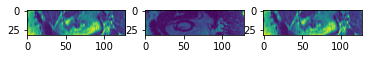

Step 100 loss [-0.182110563] lncc [-0.183474436] bending [1.36388087e-06]


<Figure size 432x288 with 0 Axes>

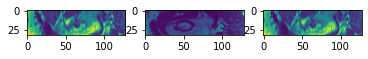

Step 150 loss [-0.183417529] lncc [-0.184914947] bending [1.49741993e-06]


<Figure size 432x288 with 0 Axes>

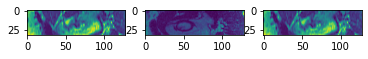

Step 200 loss [-0.184262067] lncc [-0.186316684] bending [2.05462084e-06]


<Figure size 432x288 with 0 Axes>

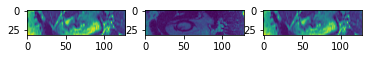

Step 250 loss [-0.184434041] lncc [-0.187702954] bending [3.268912e-06]


<Figure size 432x288 with 0 Axes>

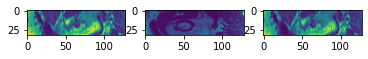

Step 300 loss [-0.181009948] lncc [-0.189072356] bending [8.06241496e-06]


<Figure size 432x288 with 0 Axes>

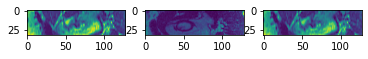

Step 350 loss [-0.172730148] lncc [-0.190419316] bending [1.76891626e-05]


<Figure size 432x288 with 0 Axes>

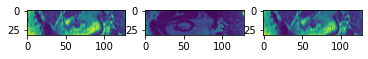

Step 400 loss [-0.162167802] lncc [-0.191727847] bending [2.95600403e-05]


<Figure size 432x288 with 0 Axes>

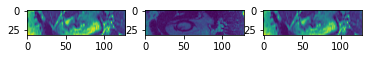

Step 450 loss [-0.156295568] lncc [-0.192972258] bending [3.66766944e-05]


<Figure size 432x288 with 0 Axes>

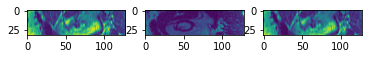

Step 500 loss [-0.151490524] lncc [-0.194151074] bending [4.26605548e-05]


<Figure size 432x288 with 0 Axes>

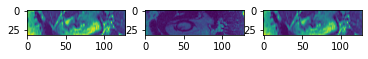

Step 550 loss [-0.148081288] lncc [-0.195269078] bending [4.71877938e-05]


<Figure size 432x288 with 0 Axes>

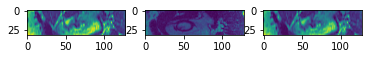

Step 600 loss [-0.143348157] lncc [-0.196325436] bending [5.29772806e-05]


<Figure size 432x288 with 0 Axes>

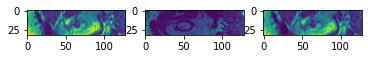

Step 650 loss [-0.138932377] lncc [-0.197315872] bending [5.83835026e-05]


<Figure size 432x288 with 0 Axes>

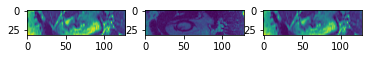

Step 700 loss [-0.142752618] lncc [-0.198245138] bending [5.54925246e-05]


<Figure size 432x288 with 0 Axes>

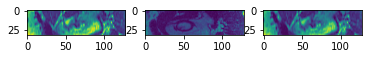

Step 750 loss [-0.146798819] lncc [-0.199116975] bending [5.23181589e-05]


<Figure size 432x288 with 0 Axes>

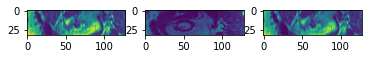

Step 800 loss [-0.132908583] lncc [-0.199943468] bending [6.70348818e-05]


<Figure size 432x288 with 0 Axes>

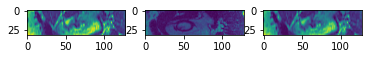

Step 850 loss [-0.123640642] lncc [-0.20071882] bending [7.70781771e-05]


<Figure size 432x288 with 0 Axes>

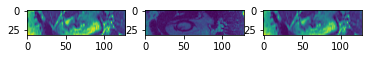

Step 900 loss [-0.130693942] lncc [-0.201452062] bending [7.07581203e-05]


<Figure size 432x288 with 0 Axes>

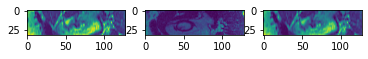

Step 950 loss [-0.142886281] lncc [-0.202146634] bending [5.92603501e-05]


<Figure size 432x288 with 0 Axes>

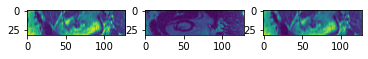

Step 1000 loss [-0.134102821] lncc [-0.202801839] bending [6.86990097e-05]


<Figure size 432x288 with 0 Axes>

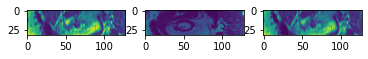

Step 1050 loss [-0.138409585] lncc [-0.203422055] bending [6.50124639e-05]


<Figure size 432x288 with 0 Axes>

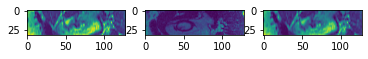

Step 1100 loss [-0.137486354] lncc [-0.204005688] bending [6.65193365e-05]


<Figure size 432x288 with 0 Axes>

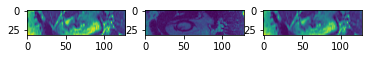

Step 1150 loss [-0.139632165] lncc [-0.204560682] bending [6.49285066e-05]


<Figure size 432x288 with 0 Axes>

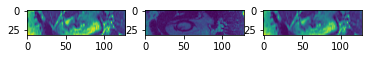

Step 1200 loss [-0.12989223] lncc [-0.205086589] bending [7.51943589e-05]


<Figure size 432x288 with 0 Axes>

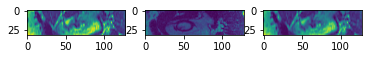

Step 1250 loss [-0.151003659] lncc [-0.205584526] bending [5.45808616e-05]


<Figure size 432x288 with 0 Axes>

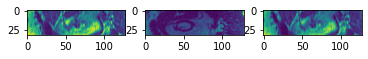

Step 1300 loss [-0.149342373] lncc [-0.206055313] bending [5.67129355e-05]


<Figure size 432x288 with 0 Axes>

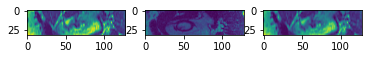

Step 1350 loss [-0.134504229] lncc [-0.206507415] bending [7.20031821e-05]


<Figure size 432x288 with 0 Axes>

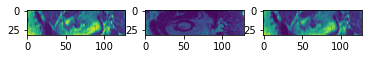

Step 1400 loss [-0.141542658] lncc [-0.206935421] bending [6.53927636e-05]


<Figure size 432x288 with 0 Axes>

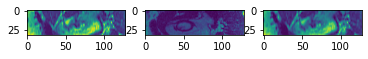

Step 1450 loss [-0.154609039] lncc [-0.207343861] bending [5.27348275e-05]


<Figure size 432x288 with 0 Axes>

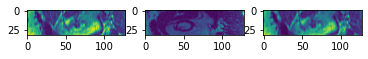

Step 1500 loss [-0.138076097] lncc [-0.207726] bending [6.96499046e-05]


<Figure size 432x288 with 0 Axes>

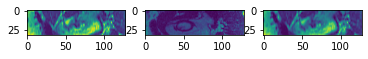

Step 1550 loss [-0.143874675] lncc [-0.208101749] bending [6.42270679e-05]


<Figure size 432x288 with 0 Axes>

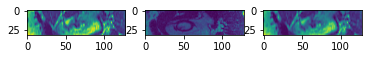

Step 1600 loss [-0.155300394] lncc [-0.208453968] bending [5.31535698e-05]


<Figure size 432x288 with 0 Axes>

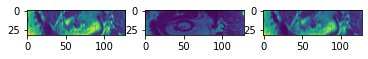

Step 1650 loss [-0.151330054] lncc [-0.208790511] bending [5.74604601e-05]


<Figure size 432x288 with 0 Axes>

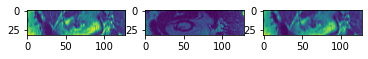

Step 1700 loss [-0.116776384] lncc [-0.209112406] bending [9.23360203e-05]


<Figure size 432x288 with 0 Axes>

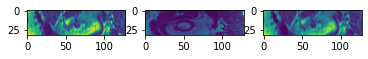

Step 1750 loss [-0.137063101] lncc [-0.209418252] bending [7.23551493e-05]


<Figure size 432x288 with 0 Axes>

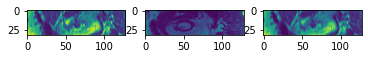

Step 1800 loss [-0.161619812] lncc [-0.209711656] bending [4.80918425e-05]


<Figure size 432x288 with 0 Axes>

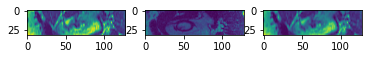

Step 1850 loss [-0.14312005] lncc [-0.209991887] bending [6.68718276e-05]


<Figure size 432x288 with 0 Axes>

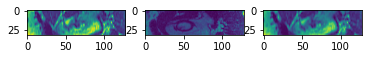

Step 1900 loss [-0.136445791] lncc [-0.210254803] bending [7.38090093e-05]


<Figure size 432x288 with 0 Axes>

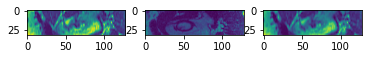

Step 1950 loss [-0.156379715] lncc [-0.210509539] bending [5.4129825e-05]


<Figure size 432x288 with 0 Axes>

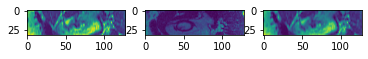

Step 2000 loss [-0.154835075] lncc [-0.210753322] bending [5.59182372e-05]


<Figure size 432x288 with 0 Axes>

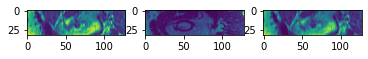

Step 2050 loss [-0.144081652] lncc [-0.210986644] bending [6.6905e-05]


<Figure size 432x288 with 0 Axes>

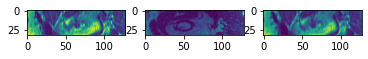

Step 2100 loss [-0.14647463] lncc [-0.211212605] bending [6.47379784e-05]


<Figure size 432x288 with 0 Axes>

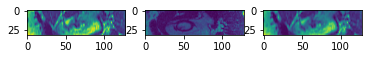

Step 2150 loss [-0.146899164] lncc [-0.211429164] bending [6.45300097e-05]


<Figure size 432x288 with 0 Axes>

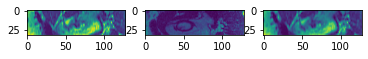

Step 2200 loss [-0.142335504] lncc [-0.211635664] bending [6.93001639e-05]


<Figure size 432x288 with 0 Axes>

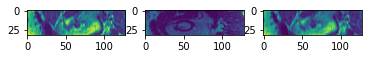

Step 2250 loss [-0.147352874] lncc [-0.211835653] bending [6.44827815e-05]


<Figure size 432x288 with 0 Axes>

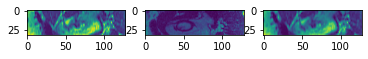

Step 2300 loss [-0.143195152] lncc [-0.212028906] bending [6.88337532e-05]


<Figure size 432x288 with 0 Axes>

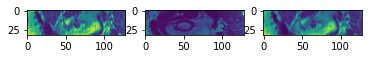

Step 2350 loss [-0.145711243] lncc [-0.212214559] bending [6.65033149e-05]


<Figure size 432x288 with 0 Axes>

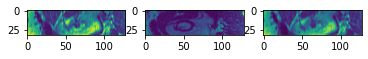

Step 2400 loss [-0.152284175] lncc [-0.212390751] bending [6.01065767e-05]


<Figure size 432x288 with 0 Axes>

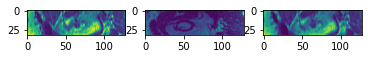

Step 2450 loss [-0.147947237] lncc [-0.212560058] bending [6.46128174e-05]


<Figure size 432x288 with 0 Axes>

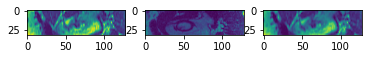

Step 2500 loss [-0.140142292] lncc [-0.212723464] bending [7.25811624e-05]


<Figure size 432x288 with 0 Axes>

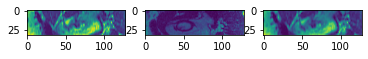

Step 2550 loss [-0.146987066] lncc [-0.212884754] bending [6.5897686e-05]


<Figure size 432x288 with 0 Axes>

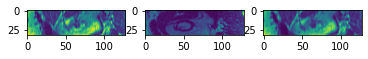

Step 2600 loss [-0.142829657] lncc [-0.213040113] bending [7.02104589e-05]


<Figure size 432x288 with 0 Axes>

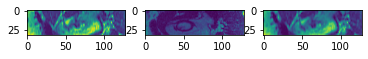

Step 2650 loss [-0.137572289] lncc [-0.213198692] bending [7.56264e-05]


<Figure size 432x288 with 0 Axes>

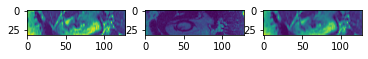

Step 2700 loss [-0.134669617] lncc [-0.213354394] bending [7.86847741e-05]


<Figure size 432x288 with 0 Axes>

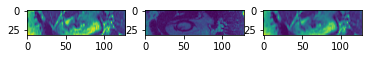

Step 2750 loss [-0.144336715] lncc [-0.213505447] bending [6.9168731e-05]


<Figure size 432x288 with 0 Axes>

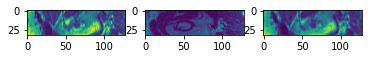

Step 2800 loss [-0.159136325] lncc [-0.213653132] bending [5.45168e-05]


<Figure size 432x288 with 0 Axes>

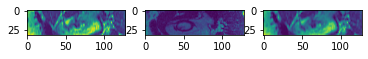

Step 2850 loss [-0.14422524] lncc [-0.213798195] bending [6.95729541e-05]


<Figure size 432x288 with 0 Axes>

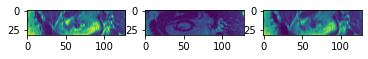

Step 2900 loss [-0.144798264] lncc [-0.21393542] bending [6.91371533e-05]


<Figure size 432x288 with 0 Axes>

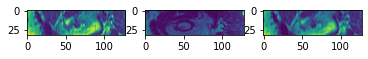

Step 2950 loss [-0.146502301] lncc [-0.214074075] bending [6.75717747e-05]


<Figure size 432x288 with 0 Axes>

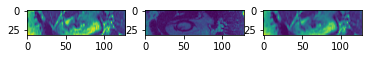

In [39]:
# We initialise our layers
fixed_image_size = fixed_image.shape

# Creating our DDF tensor that can be trained
# The DDF will be of shape [IM_SIZE_1, IM_SIZE_2, 3],
# representing the displacement field at each dimension.
var_ddf = tf.Variable(initialiser(fixed_image_size + [3]), name="ddf", trainable=True)

# We create a warping layer and initialise an optimizer
warping = layer.Warping(fixed_image_size=fixed_image_size[1:4])
optimiser = tf.optimizers.Adam(learning_rate)



## Training the layer
## With GPU this takes about 5 minutes.
for step in range(total_iter):
    # Call the gradient tape function
    loss_opt, loss_image_opt, loss_deform_opt = train_step(
        warping, var_ddf, optimiser, moving_image, fixed_image
    )
    if (step % 50) == 0:  # print info at every 50th step
        tf.print(
            "Step",
            step,
            "loss",
            loss_opt,
            image_loss_name,
            loss_image_opt,
            deform_loss_name,
            loss_deform_opt,
        )
        # Visualising loss during training
        # plt.figure()
        # fig, axs = plt.subplots(1, 3)
        # warped_moving_image = warping(inputs=[var_ddf, moving_image])
        # axs[0].imshow(moving_image[0, ..., 12])
        # axs[1].imshow(fixed_image[0, ..., 12])
        # axs[2].imshow(warped_moving_image[0, ..., 12])
        # plt.show()

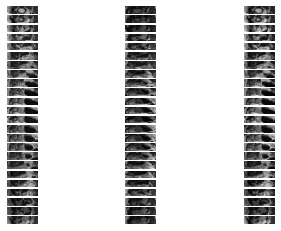

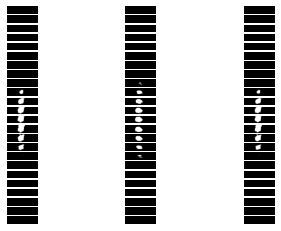

In [40]:
## Warp the moving image using the optimised ddf and the warping layer.
plot_results(warping, var_ddf, moving_image, fixed_image)

## We can observe the effects of the warping on the moving label using the optimised affine transformation
moving_label = tf.cast(tf.expand_dims(fid["label0"], axis=0), dtype=tf.float32)
fixed_label = tf.cast(tf.expand_dims(fid["label1"], axis=0), dtype=tf.float32)

plot_results(warping, var_ddf, moving_label, fixed_label)

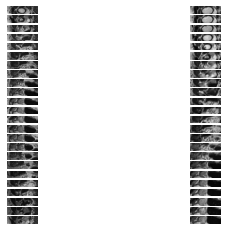

Step 0 loss [-0.169972986] lncc [-0.17259115] bending [2.61816967e-06]


<Figure size 432x288 with 0 Axes>

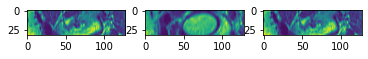

Step 50 loss [-0.133420587] lncc [-0.175350189] bending [4.19296084e-05]


<Figure size 432x288 with 0 Axes>

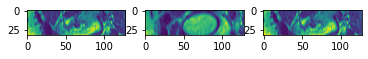

Step 100 loss [-0.175385833] lncc [-0.176668495] bending [1.28266743e-06]


<Figure size 432x288 with 0 Axes>

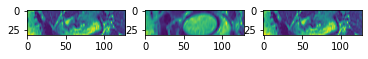

Step 150 loss [-0.176457435] lncc [-0.177835703] bending [1.37827101e-06]


<Figure size 432x288 with 0 Axes>

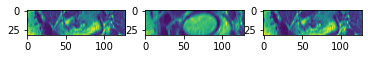

Step 200 loss [-0.17709963] lncc [-0.178961039] bending [1.86141392e-06]


<Figure size 432x288 with 0 Axes>

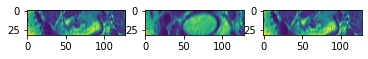

Step 250 loss [-0.176826507] lncc [-0.180074543] bending [3.24804182e-06]


<Figure size 432x288 with 0 Axes>

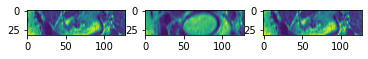

Step 300 loss [-0.173544958] lncc [-0.181178078] bending [7.63312164e-06]


<Figure size 432x288 with 0 Axes>

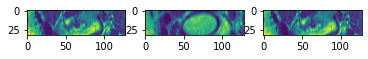

Step 350 loss [-0.165728286] lncc [-0.182244867] bending [1.65165839e-05]


<Figure size 432x288 with 0 Axes>

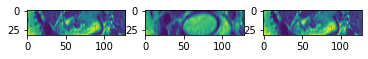

Step 400 loss [-0.15644829] lncc [-0.183276772] bending [2.68284821e-05]


<Figure size 432x288 with 0 Axes>

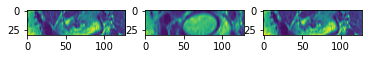

Step 450 loss [-0.147958905] lncc [-0.184261054] bending [3.63021427e-05]


<Figure size 432x288 with 0 Axes>

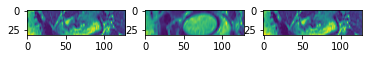

Step 500 loss [-0.13966386] lncc [-0.185182929] bending [4.55190711e-05]


<Figure size 432x288 with 0 Axes>

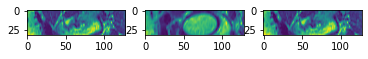

Step 550 loss [-0.135920525] lncc [-0.186044991] bending [5.01244722e-05]


<Figure size 432x288 with 0 Axes>

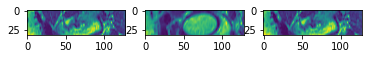

Step 600 loss [-0.132878691] lncc [-0.186846405] bending [5.3967713e-05]


<Figure size 432x288 with 0 Axes>

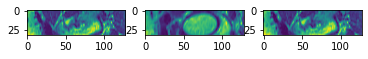

Step 650 loss [-0.129565328] lncc [-0.187586337] bending [5.80210108e-05]


<Figure size 432x288 with 0 Axes>

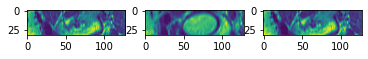

Step 700 loss [-0.130075917] lncc [-0.188273609] bending [5.81976892e-05]


<Figure size 432x288 with 0 Axes>

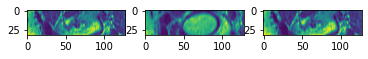

Step 750 loss [-0.127289474] lncc [-0.188913524] bending [6.16240432e-05]


<Figure size 432x288 with 0 Axes>

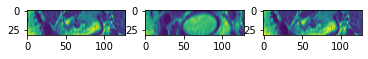

Step 800 loss [-0.122238941] lncc [-0.189512491] bending [6.72735478e-05]


<Figure size 432x288 with 0 Axes>

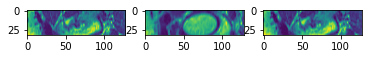

Step 850 loss [-0.129422694] lncc [-0.190067738] bending [6.06450521e-05]


<Figure size 432x288 with 0 Axes>

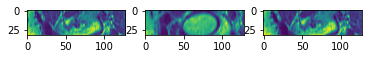

Step 900 loss [-0.123970382] lncc [-0.190594971] bending [6.66245905e-05]


<Figure size 432x288 with 0 Axes>

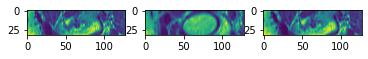

Step 950 loss [-0.12337561] lncc [-0.191071332] bending [6.76957206e-05]


<Figure size 432x288 with 0 Axes>

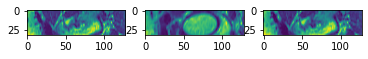

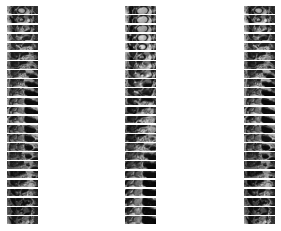

In [62]:
## predict
warped_moving_image = warping(inputs=[var_ddf, moving_image])
# Display
idx_slices = [int(5 + x * 5) for x in range(int(fixed_image_size[3] / 5) - 1)]
nIdx = len(idx_slices)
plt.figure()
for idx in range(len(idx_slices)):
    axs = plt.subplot(nIdx, 3, 3 * idx + 1)
    axs.imshow(moving_image[0, ..., idx_slices[idx]], cmap="gray")
    axs.axis("off")
    axs = plt.subplot(nIdx, 3, 3 * idx + 2)
    axs.imshow(fixed_image[0, ..., idx_slices[idx]], cmap="gray")
    axs.axis("off")
    axs = plt.subplot(nIdx, 3, 3 * idx + 3)
    axs.imshow(warped_moving_image[0, ..., idx_slices[idx]], cmap="gray")
    axs.axis("off")
plt.ion()
plt.show()


# Medical Image registration using Deep Learning Demo

Now, we will build a more complex demo to investigate a clinical case.

We will perform an inter-subject registration: aligning ct images from different patients. The images are all acquired at the same timepoint in the breathing cycle for all patients. This kind of registration is useful for determining how one stimulus affects multiple patietns. If a drug or invasive procedure is administered to multiple patients, registering the images from different patients can give medical professsionals a sense of how each patient is responding in comparison to others. An example of such an application can be seen in **[2]**.

The file IO is a bit more involved for this demo. We provide some function that do most of this for you.

In [81]:
import os
import random
import shutil
import zipfile
import nibabel as nib
import numpy as np
from tqdm import tqdm

# if wget is installed remove the following line from comment
import wget

# if already in the abc/DeepReg directory then do nothing, otherwise
# use os.chdir(r'abc/DeepReg') before this line
main_path = os.getcwd()
os.chdir(main_path)

######## DOWNLOADING AND UNZIPPING ALL FILES INTO CORRECT PATH ########

project_dir = r"demos/unpaired_ct_lung"
os.chdir(project_dir)

url = "https://zenodo.org/record/3835682/files/training.zip"
print("Downloading... This may take a couple of minutes.")
fname = wget.download(url)

print("The file ", fname, " has successfully been downloaded!")

Downloading... This may take a couple of minutes.
The file  training.zip  has successfully been downloaded!


In [85]:
data_folder_name = "data"

print(os.getcwd())
if os.path.exists(os.path.join(main_path, project_dir, data_folder_name)) is not True:
    os.makedirs(os.path.join(main_path, project_dir, data_folder_name))

with zipfile.ZipFile(fname, "r") as zip_ref:
    zip_ref.extractall(data_folder_name)

print("Files unzipped!")

os.remove(fname)
os.chdir(main_path)

/content/MICCAI_2020_reg_tutorial/DeepReg/demos/unpaired_ct_lung
Files unzipped!


In [89]:
# ######## MOVING FILES INTO TRAIN DIRECTORY ########

# The DeepReg Dataloaders require some specific folder structure, which we make now

path_to_data_folder = os.path.join(main_path, data_folder_name)
path_to_train = os.path.join(main_path, data_folder_name, "train")
path_to_test = os.path.join(main_path, data_folder_name, "test")
path_to_images_and_labels = os.path.join(
    main_path, data_folder_name, "training"
)

labels_fnames = os.listdir(os.path.join(path_to_images_and_labels, "lungMasks"))
images_fnames = os.listdir(os.path.join(path_to_images_and_labels, "scans"))

if os.path.exists(path_to_train) is not True:
    os.makedirs(path_to_train)
    os.makedirs(os.path.join(path_to_train, "fixed_images"))
    os.makedirs(os.path.join(path_to_train, "fixed_labels"))
    os.makedirs(os.path.join(path_to_train, "moving_images"))
    os.makedirs(os.path.join(path_to_train, "moving_labels"))

In [90]:
def moveFilesIntoCorrectPath(
    fnames, path_to_images_and_labels, new_path, suffix, sub_folder_name
):
    os.chdir(os.path.join(path_to_images_and_labels, sub_folder_name))
    for file in fnames:
        if "insp" in file:
            source = file
            destination = os.path.join(path_to_train, "fixed_" + suffix)
            shutil.move(source, destination)
        if "exp" in file:
            source = file
            destination = os.path.join(path_to_train, "moving_" + suffix)
            shutil.move(source, destination)


if os.path.exists(path_to_images_and_labels):

    moveFilesIntoCorrectPath(
        images_fnames, path_to_images_and_labels, path_to_train, "images", "scans"
    )
    moveFilesIntoCorrectPath(
        labels_fnames, path_to_images_and_labels, path_to_train, "labels", "lungMasks"
    )

os.chdir(main_path)

######## MOVING FILES INTO TEST AND VALID DIRECTORY ########

path_to_test = os.path.join(path_to_data_folder, "test")
path_to_valid = os.path.join(path_to_data_folder, "valid")

if os.path.exists(path_to_test) is not True:

    os.mkdir(path_to_test)
    os.mkdir(os.path.join(path_to_test, "fixed_images"))
    os.mkdir(os.path.join(path_to_test, "fixed_labels"))
    os.mkdir(os.path.join(path_to_test, "moving_images"))
    os.mkdir(os.path.join(path_to_test, "moving_labels"))

    ratio_of_test_and_valid_samples = 0.2

    unique_case_names = []
    for file in images_fnames:
        case_name_as_list = file.split("_")[0:2]
        case_name = case_name_as_list[0] + "_" + case_name_as_list[1]
        unique_case_names.append(case_name)
    unique_case_names = np.unique(unique_case_names)

    test_and_valid_cases = random.sample(
        list(unique_case_names),
        int(ratio_of_test_and_valid_samples * len(unique_case_names)),
    )
    test_cases = test_and_valid_cases[
        0 : int(int(ratio_of_test_and_valid_samples * len(unique_case_names) / 2))
    ]
    valid_cases = test_and_valid_cases[
        int(int(ratio_of_test_and_valid_samples * len(unique_case_names) / 2)) + 1 :
    ]

    def moveTestCasesIntoCorrectPath(test_cases, path_to_train, path_to_test):
        folder_names = os.listdir(path_to_train)
        os.chdir(path_to_train)
        for case in test_cases:
            for folder in folder_names:
                file_names = os.listdir(os.path.join(path_to_train, folder))
                for file in file_names:
                    if case in file:
                        os.chdir(os.path.join(path_to_train, folder))
                        source = file
                        destination = os.path.join(path_to_test, folder)
                        shutil.move(source, destination)

    moveTestCasesIntoCorrectPath(test_cases, path_to_train, path_to_test)

    os.mkdir(path_to_valid)
    os.mkdir(os.path.join(path_to_valid, "fixed_images"))
    os.mkdir(os.path.join(path_to_valid, "fixed_labels"))
    os.mkdir(os.path.join(path_to_valid, "moving_images"))
    os.mkdir(os.path.join(path_to_valid, "moving_labels"))

    moveTestCasesIntoCorrectPath(valid_cases, path_to_train, path_to_valid)

######## NAMING FILES SUCH THAT THEIR NAMES MATCH FOR PAIRING ########

# name all files such that names match exactly for training

for folder in os.listdir(path_to_train):
    path_to_folder = os.path.join(path_to_train, folder)
    os.chdir(path_to_folder)
    for file in os.listdir(path_to_folder):
        if "_insp" in file:
            new_name = file.replace("_insp", "")
        elif "_exp" in file:
            new_name = file.replace("_exp", "")
        source = file
        destination = new_name
        os.rename(source, destination)

# name all files such that names match exactly for testing

for folder in os.listdir(path_to_test):
    path_to_folder = os.path.join(path_to_test, folder)
    os.chdir(path_to_folder)
    for file in os.listdir(path_to_folder):
        if "_insp" in file:
            new_name = file.replace("_insp", "")
        elif "_exp" in file:
            new_name = file.replace("_exp", "")
        source = file
        destination = new_name
        os.rename(source, destination)

# name all files such that names match exactly for validation

for folder in os.listdir(path_to_valid):
    path_to_folder = os.path.join(path_to_valid, folder)
    os.chdir(path_to_folder)
    for file in os.listdir(path_to_folder):
        if "_insp" in file:
            new_name = file.replace("_insp", "")
        elif "_exp" in file:
            new_name = file.replace("_exp", "")
        source = file
        destination = new_name
        os.rename(source, destination)

shutil.rmtree(os.path.join(path_to_images_and_labels))
os.chdir(main_path)

######## FOR UNPAIRED WE USE IMAMGES FROM ONE TIMEPOINT ONLY ########

# so now remove fixed_images and fixed_labels
# and rename moving_images to images
# and moving_labels to labels

folders = os.listdir(os.path.join(project_dir, data_folder_name))

for folder in folders:
    shutil.rmtree(os.path.join(project_dir, data_folder_name, folder, "fixed_images"))
    shutil.rmtree(os.path.join(project_dir, data_folder_name, folder, "fixed_labels"))
    os.rename(
        os.path.join(project_dir, data_folder_name, folder, "moving_images"),
        os.path.join(project_dir, data_folder_name, folder, "images"),
    )
    os.rename(
        os.path.join(project_dir, data_folder_name, folder, "moving_labels"),
        os.path.join(project_dir, data_folder_name, folder, "labels"),
    )

print("All files moved and restructured")

os.chdir(main_path)

######## NOW WE RESACLE THE IMAGES TO 255 ########

data_dir = r"demos/unpaired_ct_lung/data"
folders = os.listdir(data_dir)

for folder in folders:
    subfolders = os.listdir(os.path.join(data_dir, folder))
    print("\n Working on ", folder, ", progress:")
    for subfolder in tqdm(subfolders):
        files = os.listdir(os.path.join(data_dir, folder, subfolder))
        for file in files:
            if file.startswith("case_020"):  # this case did not laod correctly
                os.remove(os.path.join(data_dir, folder, subfolder, file))
            else:
                im_data = np.asarray(
                    nib.load(os.path.join(data_dir, folder, subfolder, file)).dataobj,
                    dtype=np.float32,
                )
                if np.max(im_data) > 255.0:
                    im_data = ((im_data + 285) / (3770 + 285)) * 255.0  # rescale image
                    img = nib.Nifti1Image(im_data, affine=None)
                    nib.save(img, os.path.join(data_dir, folder, subfolder, file))
                    if np.max(img.dataobj) > 255.0:
                        print(
                            "Recheck the following file: ",
                            os.path.join(data_dir, folder, subfolder, file),
                        )
                    nib.save(img, os.path.join(data_dir, folder, subfolder, file))

All files moved and restructured


In [93]:
from deepreg.train import train
! ls
######## NOW WE DO THE TRAINING ########

gpu = tf.test.gpu_device_name()
gpu_allow_growth = True
ckpt_path = ""
log_dir = "learn2reg_t2_unpaired_train_logs"
config_path = [
    os.path.join(os.getcwd(), "deepreg/config/test/ddf.yaml"),
    os.path.join(os.getcwd(),"demos/unpaired_ct_lung/unpaired_ct_lung.yaml"),
]
train(
    gpu=gpu,
    config_path=config_path,
    gpu_allow_growth=gpu_allow_growth,
    ckpt_path=ckpt_path,
    log_dir=log_dir,
)

data		 demos		README.md
demo_data.py	 demo_train.py	training.ziprf673fdx.tmp
demo_predict.py  logs		unpaired_ct_lung.yaml


FileNotFoundError: ignored

In [ ]:

from deepreg.predict import predict

######## PREDICTION ########

log_dir = "learn2reg_t2_unpaired_train_logs"
ckpt_path = os.path.join("logs", log_dir, "save", "weights-epoch2.ckpt")

gpu = ""
gpu_allow_growth = False
predict(
    gpu=gpu,
    gpu_allow_growth=gpu_allow_growth,
    ckpt_path=ckpt_path,
    mode="test",
    batch_size=1,
    log_dir=log_dir,
    sample_label="all",
)

# the numerical metrics are saved in the logs directory specified

######## VISUALISATION ########

# Now lets load in a few samples from the predicitons and plot them

# change the following line to the path to image0 label0
path_to_image0_label0 = r""
os.chdir(path_to_image0_label0)

# change image names if different images need to be plotted instead

plt.subplot(3, 2, 1)
label144 = plt.imread("depth144_fixed_label.png")
plt.imshow(label144)
plt.title("Label")
plt.axis("off")

plt.subplot(3, 2, 2)
pred144 = plt.imread("depth144_fixed_pred.png")
plt.imshow(pred144)
plt.title("Prediction")
plt.axis("off")


plt.subplot(3, 2, 3)
label145 = plt.imread("depth145_fixed_label.png")
plt.imshow(label145)
plt.axis("off")

plt.subplot(3, 2, 4)
pred145 = plt.imread("depth145_fixed_pred.png")
plt.imshow(pred145)
plt.axis("off")


plt.subplot(3, 2, 5)
label184 = plt.imread("depth184_fixed_label.png")
plt.imshow(label184)
plt.axis("off")

plt.subplot(3, 2, 6)
pred184 = plt.imread("depth184_fixed_pred.png")
plt.imshow(pred184)
plt.axis("off")

# this is the path where you want to save the visualisation as a png
path_to_save_fig = r""
plt.savefig(os.path.join(path_to_save_fig, "labels_and_preds.png"))

print("Visual representation of predictions saved to path specified")